In [ ]:
1.Kỹ thuật Binning : phân khoảng biến định lượng thành các khoảng định tính
Mục đích:
    Giảm thiểu dữ liệu nhiễu(noise)
    Làm mịn (smooth) dữ liệu 
    

In [1]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'points': [4, 4, 7, 8, 12, 13, 15, 18, 22, 23, 23, 25],
                   'assists': [2, 5, 4, 7, 7, 8, 5, 4, 5, 11, 13, 8],
                   'rebounds': [7, 7, 4, 6, 3, 8, 9, 9, 12, 11, 8, 9]})


In [3]:
df.shape

(12, 3)

In [4]:
df

,points,assists,rebounds
0,4,2,7
1,4,5,7
2,7,4,4
3,8,7,6
4,12,7,3
5,13,8,8
6,15,5,9
7,18,4,9
8,22,5,12
9,23,11,11


In [5]:
#perform data binning on points variable
#Chia làm 5 khoảng có số lượng phần tử trong từng khoảng xấp xỉ bằng nhau
df['points_bin'] = pd.qcut(df['points'], q=5)
#view updaeted DataFrame
df

,points,assists,rebounds,points_bin
0,4,2,7,"(3.999, 7.2]"
1,4,5,7,"(3.999, 7.2]"
2,7,4,4,"(3.999, 7.2]"
3,8,7,6,"(7.2, 12.4]"
4,12,7,3,"(7.2, 12.4]"
5,13,8,8,"(12.4, 16.8]"
6,15,5,9,"(12.4, 16.8]"
7,18,4,9,"(16.8, 22.8]"
8,22,5,12,"(16.8, 22.8]"
9,23,11,11,"(22.8, 25.0]"


In [6]:
#count frequency of each bin
df['points_bin'].value_counts()

points_bin
(3.999, 7.2]    3
(22.8, 25.0]    3
(7.2, 12.4]     2
(12.4, 16.8]    2
(16.8, 22.8]    2
Name: count, dtype: int64

In [7]:
#perform data binning on points variable with specific quantiles
df['points_bin'] = pd.qcut(df['points'], q=[0, .4, .6, 1]) # Chia khoảng 0 -> 0.4 là 40% cho khoảng đầu
                                                           # Khoảng 2 từ 0.4 -> 0.6 là 20% 
                                                           # Khoảng 3 từ 0.6 -> là 40%
#view updated DataFrame
df

,points,assists,rebounds,points_bin
0,4,2,7,"(3.999, 12.4]"
1,4,5,7,"(3.999, 12.4]"
2,7,4,4,"(3.999, 12.4]"
3,8,7,6,"(3.999, 12.4]"
4,12,7,3,"(3.999, 12.4]"
5,13,8,8,"(12.4, 16.8]"
6,15,5,9,"(12.4, 16.8]"
7,18,4,9,"(16.8, 25.0]"
8,22,5,12,"(16.8, 25.0]"
9,23,11,11,"(16.8, 25.0]"


In [8]:
#perform data binning on points variable with specific quantiles and labels
df['points_bin'] = pd.qcut(df['points'],
                           q=[0, .2, .4, .6, .8, 1],
                           labels=['A', 'B', 'C', 'D', 'E']) # đặt tên cho từng khoảng

#view updated DataFrame
df

    points  assists  rebounds points_bin
0        4        2         7          A
1        4        5         7          A
2        7        4         4          A
3        8        7         6          B
4       12        7         3          B
5       13        8         8          C
6       15        5         9          C
7       18        4         9          D
8       22        5        12          D
9       23       11        11          E
10      23       13         8          E
11      25        8         9          E


# Dữ liệu phân loại 

In [12]:
import pandas as pd

#create DataFrame with one categorical variable and one numeric variable
df = pd.DataFrame({'team': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
                   'points': [12, 15, 19, 22, 24, 25, 26, 30]})
df.dtypes

team      object
points     int64
dtype: object

In [13]:
#View DataFrame
df

,team,points
0,A,12
1,B,15
2,C,19
3,D,22
4,E,24
5,F,25
6,G,26
7,H,30


In [11]:
#create categorical variable 'status' based on existing numerical 'points' variable
df['status'] = pd.cut(df['points'],
                      bins=[0, 15, 25, float('Inf')], # float('Inf'): là vô cực
                      labels=['Bad', 'OK', 'Good'])
df

,team,points,status
0,A,12,Bad
1,B,15,Bad
2,C,19,OK
3,D,22,OK
4,E,24,OK
5,F,25,OK
6,G,26,Good
7,H,30,Good


In [ ]:
One Hot Encoding: 
ID 	GT	GT(số)		F 	M	G	L
S01  F	   0		1	0	0	0
S02  F	   0		1	0	0	0
S03  M	   1		0	1	0	0
S04  F	   0		1	0	0	0
S05  GT	   2		0	0	1	0
S06  L	   3		0	0	0	1
S07  GT	   2		0	0	1	0

In [14]:
import pandas as pd

ids = [11, 22, 33, 44, 55, 66, 77] 
countries = ['Spain', 'France', 'Spain', 'Germany', 'France']

df = pd.DataFrame(list(zip(ids, countries)), 
                  columns=['Ids', 'Countries'])


In [15]:
df

,Ids,Countries
0,11,Spain
1,22,France
2,33,Spain
3,44,Germany
4,55,France


In [16]:
dfOneHotEndcoding = pd.get_dummies(df.Countries, prefix='Country') # Thêm tiếp đầu ngữ phía trước là Country
print(dfOneHotEndcoding.head())

   Country_France  Country_Germany  Country_Spain
0           False            False           True
1            True            False          False
2           False            False           True
3           False             True          False
4            True            False          False


In [17]:
df = pd.concat([df,dfOneHotEndcoding],axis = 1)
df

,Ids,Countries,Country_France,Country_Germany,Country_Spain
0,11,Spain,False,False,True
1,22,France,True,False,False
2,33,Spain,False,False,True
3,44,Germany,False,True,False
4,55,France,True,False,False


In [18]:
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(df.Countries)
y

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [21]:
from sklearn.preprocessing import OneHotEncoder
y = OneHotEncoder().fit_transform(df[['Countries']]).toarray()
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
Nonmalization                                 Machine Learning
                                        MaxabsoluteScale, x(scale) = x / max|x|   các giá trị sau scale từ [-1,1]   |   MinMaxScale, x(scale) = x-xmin / ( xmax - xmin) các giá trị sau scale từ[0,1]
Năm LươngHCM  LươngLA   đơn vị(triệu)   
2010    8.5        5.5                                     5.5/6.0=0.92                                                               5.5-5.0/(6.0-5.0) = 0.5
2011    9.0        6.0                                       ...  = 1                                                                       ...         = 1.0
2012    9.5        6.0                  =>                   ...  = 1                                                                       ...         = 1.0
2013    9.0        5.5                                       ...  = 0.92                                                                    ...         = 0.5
2014    10         6.0                                       ...  = 1                                                                       ...         = 1.0
2015    10         5.0                                       ...  = 0.92                                                                    ...         = 0.0
                max |x| = 6.0
                min |x| = 5.0
Hệ quy chiếu: xác định dựa vào : giá trị trung bình
                                 độ lệch chuẩn
            
Z-score: standardization : tìm kiếm định nghĩa trên mạng
    
Công thức:  x - giá trị trung bình / độ lệch chuẩn

In [23]:
import numpy as np
import pandas as pd

year      = [2010,2011,2012,2013,2014,2015]
salaryHCM = [8.5,9.0,9.5,9.0,10.0,10.0]
salaryLA  = [5.5,6.0,6.0,5.5,6.0,5.0]
# sinh viên tự tạo df dùng zip
df = pd.DataFrame(list(zip(year, salaryHCM,salaryLA)), 
                   columns=['Year', 'SalaryHCM','SalaryLA'])
df

,Year,SalaryHCM,SalaryLA
0,2010,8.5,5.5
1,2011,9.0,6.0
2,2012,9.5,6.0
3,2013,9.0,5.5
4,2014,10.0,6.0
5,2015,10.0,5.0


In [28]:
df['SalaryHCM'].mean()

9.333333333333334

In [29]:
df['SalaryHCM'].std()

0.6055300708194984

In [31]:
df['SalaryLA'].mean()

5.666666666666667

In [32]:
df['SalaryLA'].std()

0.408248290463863

In [ ]:
Bạn A ở HCM lương 15tr
Bạn B ở LA lương 15tr
Z-score A = 15-9.3 / 0.6 = 10
Z-score B = 15-5.6 / 0.4 = 24
( hình công thức ở trong điện thoại) 



In [ ]:
Mục đích:
    - Làm giới hạn lại miền giá trị,
    - Giảm thiểu việc tính toán, hỗ trợ trong Machine Learning

In [33]:
import pandas as pd

df = pd.DataFrame.from_dict({
    'Age': [10, 35, 34, 23, 70, 55, 89],
    'Height': [130, 178, 155, 133, 195, 150, 205],
    'Weight': [80, 200, 220, 150, 140, 95, 180]
})

In [34]:
# maximum absolute scaling
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df.columns:
    df[col] = absolute_maximum_scale(df[col])

print(df)

        Age    Height    Weight
0  0.112360  0.634146  0.363636
1  0.393258  0.868293  0.909091
2  0.382022  0.756098  1.000000
3  0.258427  0.648780  0.681818
4  0.786517  0.951220  0.636364
5  0.617978  0.731707  0.431818
6  1.000000  1.000000  0.818182


In [41]:
# Use Scikit-learn to transform with maximum absolute scaling
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(df)
scaled = scaler.transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

print(scaled_df) 
#(Xem lại câu này)

        Age    Height    Weight
0 -0.801303 -0.816609 -1.000000
1 -0.231270  0.346021  0.663366
2 -0.254072 -0.211073  0.940594
3 -0.504886 -0.743945 -0.029703
4  0.566775  0.757785 -0.168317
5  0.224756 -0.332180 -0.792079
6  1.000000  1.000000  0.386139


In [36]:
#MinMaxScale
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

for col in df.columns:
    df[col] = min_max_scaling(df[col])

print(df.head())

        Age    Height    Weight
0  0.000000  0.000000  0.000000
1  0.316456  0.640000  0.857143
2  0.303797  0.333333  1.000000
3  0.164557  0.040000  0.500000
4  0.759494  0.866667  0.428571


In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

print(scaled_df)

        Age    Height    Weight
0  0.000000  0.000000  0.000000
1  0.316456  0.640000  0.857143
2  0.303797  0.333333  1.000000
3  0.164557  0.040000  0.500000
4  0.759494  0.866667  0.428571
5  0.569620  0.266667  0.107143
6  1.000000  1.000000  0.714286


In [42]:
#Z-score
def z_score_standardization(series):
    return (series - series.mean()) / series.std()

for col in df.columns:
    df[col] = z_score_standardization(df[col])

print(df)

        Age    Height    Weight
0 -1.270474 -1.141772 -1.384428
1 -0.366682  0.483802  0.918383
2 -0.402833 -0.295119  1.302185
3 -0.800502 -1.040174 -0.041122
4  0.898628  1.059526 -0.233023
5  0.356352 -0.464450 -1.096577
6  1.585510  1.398187  0.534581


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns=df.columns)

print(scaled_df)

        Age    Height    Weight
0 -1.372269 -1.233255 -1.495353
1 -0.396061  0.522566  0.991967
2 -0.435110 -0.318765  1.406520
3 -0.864641 -1.123516 -0.044416
4  0.970629  1.144419 -0.251693
5  0.384905 -0.501663 -1.184438
6  1.712547  1.510215  0.577414


In [ ]:
Adjust Data ( Hiệu chỉnh dữ liệu ) Tìm kiếm định nghĩa trên mạng 
có cách hàm hỗ trợ như : - log
                         - sqirt
'https://www.visual-design.net/post/data-transformation-and-feature-engineering-in-python'

In [ ]:
Smoothing Data ( Làm mịn dữ liệu ) 


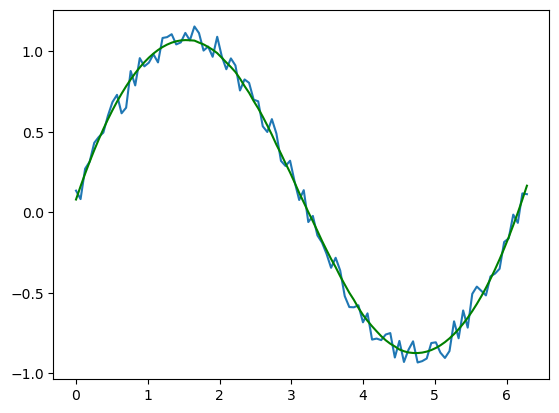

In [43]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = savgol_filter(y, 51, 3)

plt.plot(x, y)
plt.plot(x,yhat, color='green')
plt.show()

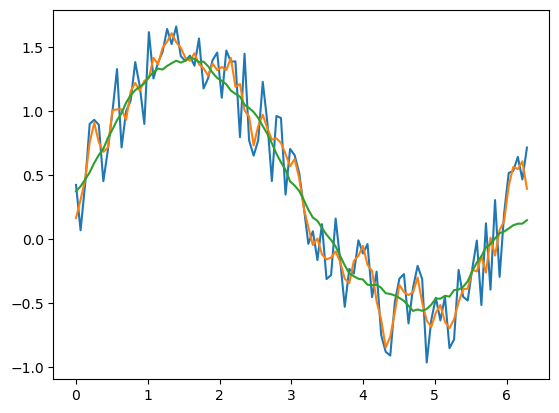

In [44]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.8

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

plt.plot(x, y)
plt.plot(x, smooth(y,3))
plt.plot(x, smooth(y,19))